In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import linear_model

In [5]:
filepath = '../data/CheMBL_data_all_lipinski.csv'
df = pd.read_csv(filepath)
df 

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.19,2.66,0,4
1,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.35,3.63,0,3
2,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,Active,372.24,4.39,0,3
3,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,Active,419.24,4.24,0,3
4,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,Inactive,327.79,4.28,0,3
...,...,...,...,...,...,...,...
388,CHEMBL4848534,Cn1cc(SCC(=O)NCc2ccccc2)c2ccccc21,Inactive,310.42,3.59,1,3
389,CHEMBL4864930,Cn1cc(SCC(=O)N(Cc2ccccc2)Cc2ccccc2)c2ccccc21,Inactive,400.55,5.50,0,3
390,CHEMBL4854494,COc1ccccc1CNC(=O)CSc1c[nH]c2ccc(Br)cc12,Inactive,405.32,4.35,2,3
391,CHEMBL4852238,COc1ccccc1CNC(=O)CSc1c[nH]c2cc(Br)ccc12,Inactive,405.32,4.35,2,3


In [6]:
df['class'] = df['class'].astype('category')
df['label'] = df['class'].cat.codes
df

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,label
0,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.19,2.66,0,4,1
1,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.35,3.63,0,3,1
2,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,Active,372.24,4.39,0,3,0
3,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,Active,419.24,4.24,0,3,0
4,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,Inactive,327.79,4.28,0,3,1
...,...,...,...,...,...,...,...,...
388,CHEMBL4848534,Cn1cc(SCC(=O)NCc2ccccc2)c2ccccc21,Inactive,310.42,3.59,1,3,1
389,CHEMBL4864930,Cn1cc(SCC(=O)N(Cc2ccccc2)Cc2ccccc2)c2ccccc21,Inactive,400.55,5.50,0,3,1
390,CHEMBL4854494,COc1ccccc1CNC(=O)CSc1c[nH]c2ccc(Br)cc12,Inactive,405.32,4.35,2,3,1
391,CHEMBL4852238,COc1ccccc1CNC(=O)CSc1c[nH]c2cc(Br)ccc12,Inactive,405.32,4.35,2,3,1


In [7]:
df2 = df.copy()
df2 = df2.drop(['molecule_chembl_id','canonical_smiles','class'], axis=1)
df2

,MW,LogP,NumHDonors,NumHAcceptors,label
0,421.19,2.66,0,4,1
1,293.35,3.63,0,3,1
2,372.24,4.39,0,3,0
3,419.24,4.24,0,3,0
4,327.79,4.28,0,3,1
...,...,...,...,...,...
388,310.42,3.59,1,3,1
389,400.55,5.50,0,3,1
390,405.32,4.35,2,3,1
391,405.32,4.35,2,3,1


In [8]:
X = df2.drop(['label'], axis=1)

In [9]:
y = df2['label'].astype("category")

In [10]:
from supervised_cls import LazyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =1, stratify=y)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None, predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models
#predictions

100%|██████████| 28/28 [00:00<00:00, 31.60it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.86,0.77,0.77,0.85,0.11
LabelPropagation,0.86,0.76,0.76,0.85,0.02
LabelSpreading,0.86,0.76,0.76,0.85,0.01
RandomForestClassifier,0.85,0.75,0.75,0.84,0.13
BaggingClassifier,0.84,0.74,0.74,0.83,0.03
DecisionTreeClassifier,0.81,0.74,0.74,0.81,0.01
AdaBoostClassifier,0.84,0.72,0.72,0.82,0.10
ExtraTreeClassifier,0.81,0.71,0.71,0.80,0.01
XGBClassifier,0.82,0.70,0.70,0.81,0.18


[(0.0, 1.0)]

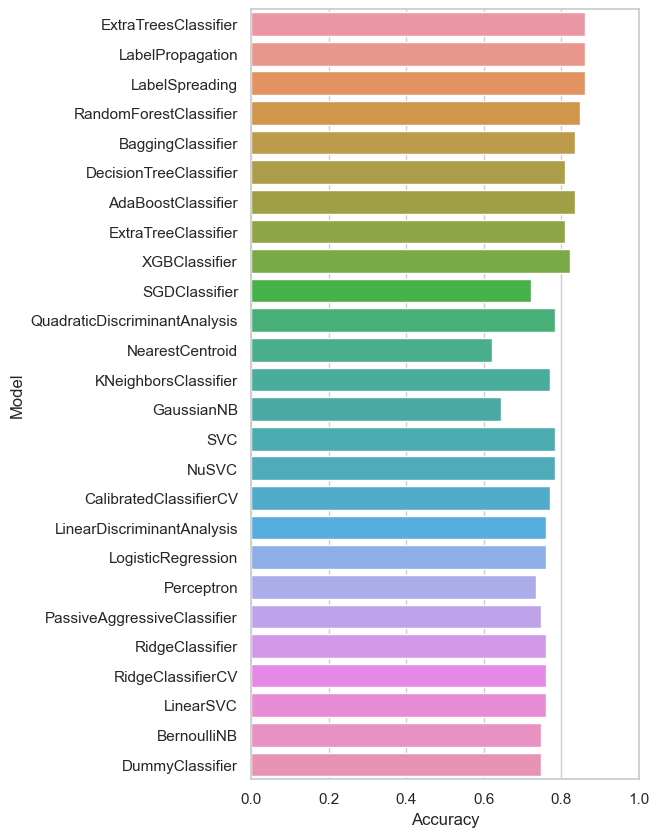

In [11]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

y_pred_class

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0])

              precision    recall  f1-score   support

           0       0.85      0.55      0.67        20
           1       0.86      0.97      0.91        59

    accuracy                           0.86        79
   macro avg       0.85      0.76      0.79        79
weighted avg       0.86      0.86      0.85        79



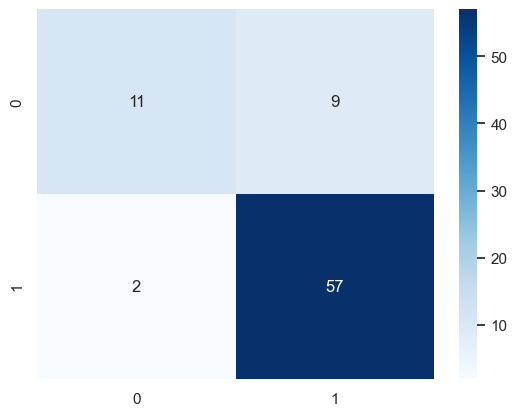

In [14]:
from numpy.testing._private.utils import nulp_diff
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_test , y_pred_class)
sns.heatmap(cf_matrix, annot=True, cmap='Blues') 

print(classification_report(y_test , y_pred_class))